BOLD regressor prediction and convolution.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import wes
import seaborn as sns

# allow inline plotting in the notebook
%matplotlib inline
pal = wes._lib._cycles['FantasticFox']
sns.set_palette(pal)
sns.set_style('whitegrid')

In [2]:
# Get data from last homework.
rpes = np.array([ 1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                 -2.00000000e-01,   1.00000000e+00,  -1.60000000e-01,
                  8.72000000e-01,   6.97600000e-01,   8.00000000e-01,
                  6.40000000e-01,  -4.41920000e-01,  -3.53536000e-01,
                 -2.82828800e-01,   7.73736960e-01,   5.12000000e-01,
                  6.18989568e-01,   4.95191654e-01,   4.09600000e-01,
                  3.96153324e-01,   3.27680000e-01,   2.62144000e-01,
                  2.09715200e-01,   3.16922659e-01,   2.53538127e-01,
                  2.02830502e-01,   1.62264401e-01,   1.67772160e-01,
                  1.29811521e-01,   1.03849217e-01,   8.30793735e-02,
                  1.34217728e-01,   1.07374182e-01,   8.58993459e-02,
                  6.64634988e-02,   5.31707990e-02,   6.87194767e-02,
                  5.49755814e-02,   4.39804651e-02,   3.51843721e-02,
                  4.25366392e-02,   2.81474977e-02,   2.25179981e-02,
                  1.80143985e-02,   1.44115188e-02,   3.40293114e-02,
                  2.72234491e-02,   2.17787593e-02,   1.15292150e-02,
                  1.74230074e-02,   9.22337204e-03,])

Experiment lasts 290.0 seconds.


/Users/salo/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


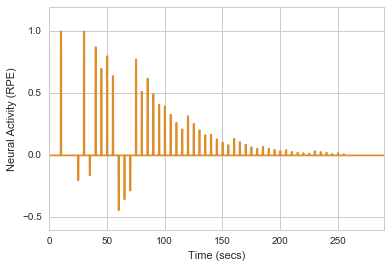

In [3]:
# Experiment length = 10s start, 50 500ms RPEs, 49 4.5s ITIs, and 30s end.
exp_len = 10 + (0.5 * 50) + (4.5 * 50) + 30  # seconds
tr = 2.
dt = 0.05

# Preallocate 'activity' array with zeros.
activity = np.zeros(int(exp_len / dt))

# Create a 'time' array in a scale of seconds, for reference.
t = np.arange(0.05, exp_len+0.01, 0.05)
print('Experiment lasts {0} seconds.'.format(np.max(t)))

# The first stimulus is presented after 5 seconds.
# It lasts for 500 ms, or 10 steps of 50 ms.
# It produces activity level from RPEs
for i, RPE in enumerate(rpes):
    # Calculate when to start presenting the stimulus.
    stim_start = 10 + (i * 5)
    # The stimulus end should be simply the start plus 0.5s.
    stim_end = stim_start + 0.5
    activity[(t>stim_start) & (t<=stim_end)] = RPE

# Plot the activity array.
fig, ax = plt.subplots()
ax.plot(t, activity)
ax.set_xlabel('Time (secs)')
ax.set_ylabel('Neural Activity (RPE)')
ax.set_xlim((0, 290))
fig.show()

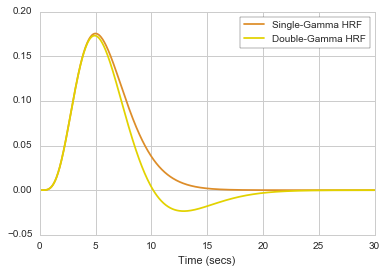

In [4]:
# HRF time window is 30s.
hrf_t = np.arange(.05, 30.01, .05)

# Single-gamma HRF.
single_gamma = gamma.pdf(hrf_t, 6)

# Use a different gamma to create the negative part of the HRF.
# This component has smaller amplitude, so we scale it down.
negative_hrf = 0.3 * gamma.pdf(hrf_t, 12)

# Subtract negative gamma from positive gamma to get
# Double-gamma HRF
double_gamma = single_gamma - negative_hrf

# Plot both single- and double-gamma HRFs
fig, ax = plt.subplots()
ax.plot(hrf_t, single_gamma, label='Single-Gamma HRF')
ax.plot(hrf_t, double_gamma, label='Double-Gamma HRF')
ax.set_xlabel('Time (secs)')
legend = ax.legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
ax.set_xlim((0, 30))
fig.show()

# Question 1: Double-Gamma
Create prediction of BOLD response using double-gamma HRF.

## Part A: Plot Raw Predicted BOLD Response

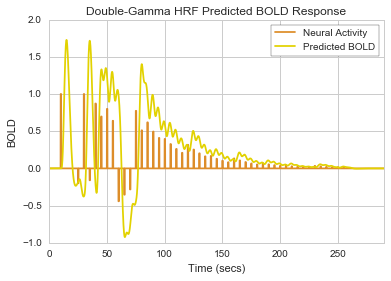

In [5]:
# Convolve neural activity with HRF.
BOLD = np.convolve(activity, double_gamma)

# Remove extra points from convolved array.
BOLD = BOLD[:len(activity)]

# Plot
fig, ax = plt.subplots()
ax.plot(t, activity, label='Neural Activity')
ax.plot(t, BOLD, label='Predicted BOLD')

legend = ax.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

ax.set_xlabel('Time (secs)')
ax.set_ylabel('BOLD')
ax.set_title('Double-Gamma HRF Predicted BOLD Response')
ax.set_xlim((0, 290))
fig.show()

## Part B: Plot Downsampled Predicted BOLD Response

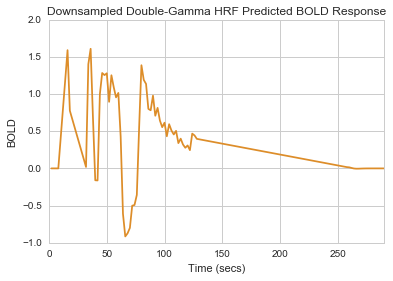

In [6]:
# Convolve neural activity with HRF.
BOLD2 = np.convolve(activity, double_gamma)

# Remove extra points from convolved array.
BOLD2 = BOLD2[:len(activity)]

BOLD2_ds = BOLD2[np.mod(t, tr)==0]
t_ds = t[np.mod(t, tr)==0]

# Plot
fig, ax = plt.subplots()
ax.plot(t_ds, BOLD2_ds, label='Double-Gamma')
ax.set_xlabel('Time (secs)')
ax.set_ylabel('BOLD')
ax.set_title('Downsampled Double-Gamma HRF Predicted BOLD Response')
ax.set_xlim((0, 290))
fig.show()

## Part C: Save to File

In [7]:
# Save a text file with predictions.
np.savetxt('predicted_activity.txt', activity)
np.savetxt('predicted_BOLD.txt', BOLD2_ds)

# Question 2: Single-Gamma
Create prediction of BOLD response using single-gamma HRF.

## Part A: Plot Downsampled Predicted BOLD Response

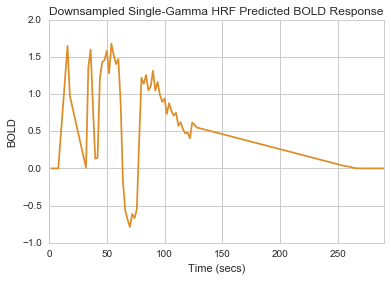

In [8]:
# Convolve neural activity with HRF.
BOLD1 = np.convolve(activity, single_gamma)

# Remove extra points from convolved array.
BOLD1 = BOLD1[:len(activity)]

BOLD1_ds = BOLD1[np.mod(t, tr)==0]
t_ds = t[np.mod(t, tr)==0]

# Plot
fig, ax = plt.subplots()
ax.plot(t_ds, BOLD1_ds, label='Single-Gamma')
ax.set_xlabel('Time (secs)')
ax.set_ylabel('BOLD')
ax.set_title('Downsampled Single-Gamma HRF Predicted BOLD Response')
ax.set_xlim((0, 290))
fig.show()

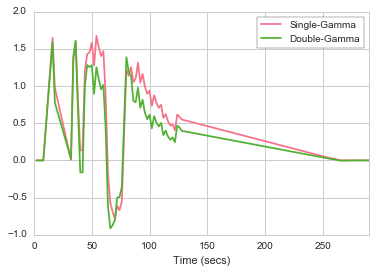

In [9]:
# Plot both together for direct comparison
fig, ax = plt.subplots()
ax.plot(t_ds, BOLD1_ds, c=sns.color_palette('husl')[0], label='Single-Gamma')
ax.plot(t_ds, BOLD2_ds, c=sns.color_palette('husl')[2], label='Double-Gamma')

legend = ax.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

ax.set_xlabel('Time (secs)')
ax.set_xlim((0, 290))
fig.show()

The single-gamma HRF appears to consistently predict larger BOLD responses than the double-gamma HRF, as can be seen between ~45s and ~60s, as well as between ~80s and ~250s. Given that the double-gamma HRF is a more physiologically realistic model, it is likely that the single-gamma HRF would underestimate beta values in a model with real fMRI data.

## Part B: Correlation of HRF Predictions

In [10]:
corr = np.corrcoef(BOLD1_ds, BOLD2_ds)[0, 1]
print('The correlation between single-gamma and double-gamma BOLD predictions is {0}.'.format(corr))

The correlation between single-gamma and double-gamma BOLD predictions is 0.96742269984.


The two predictions are extremely similar. Since they are so similar, I expect that the choice of HRF would not make a big difference in model-based fMRI results. However, since the shape of the BOLD response differs across the brain, it is possible that neither of these HRFs would fit the data very well, depending on the brain region. It would probably be best to empirically define HRFs from BOLD responses in the motor or visual cortex for each subject individually.